# Introduction to Time Series Forecasting with Python

[link](https://s3.amazonaws.com/MLMastery/time_series_forecasting_with_python_mini_course.pdf?__s=5rsrwvszahppe1a4vkg6)

In [1]:
from math import sqrt
import numpy as np

In [2]:
import pandas as pd
from pandas import Series

In [40]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.model_selection import train_test_split

### Load the births dataset

[link](https://datamarket.com/data/set/235k/daily-total-female-births-in-california-1959#!ds=235k&display=line)

In [8]:
births_series = Series.from_csv('data/daily-total-female-births-in-cal.csv', header=0)
births_series = births_series[:-1]

In [53]:
births_series.index = index=pd.to_datetime(births_series.index)

In [54]:
births_series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64

In [55]:
births_series.size

365

In [56]:
births_series['1959-06-24']

33

In [57]:
births_series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Daily total female births in California, 1959, dtype: float64

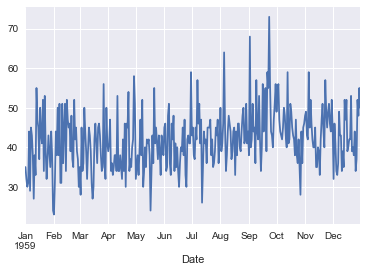

In [58]:
births_series.plot()

### Load shampoo sales dataset
[link](https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line)

In [14]:
sales_series = Series.from_csv('data/sales-of-shampoo-over-a-three-ye.csv', header=0)
sales_series = sales_series[:-1]

In [15]:
sales_series.index = index=pd.to_datetime(sales_series.index.map(lambda x : '0'+x), format='%y-%m')

Line Plot

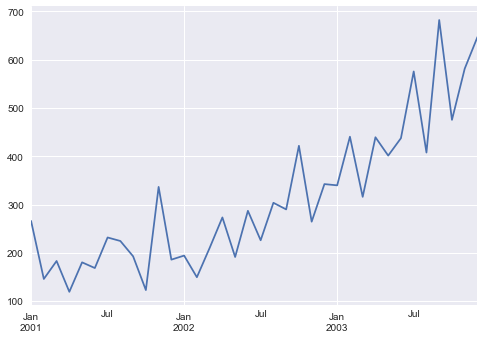

In [16]:
sales_series.plot()

Histogram

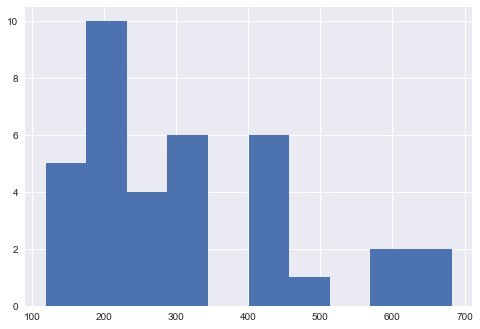

In [17]:
sales_series.hist()

Density plot

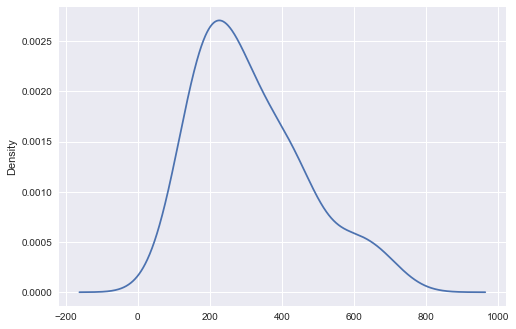

In [18]:
sales_series.plot(kind='kde')

Box and Wiskers Plot by Year

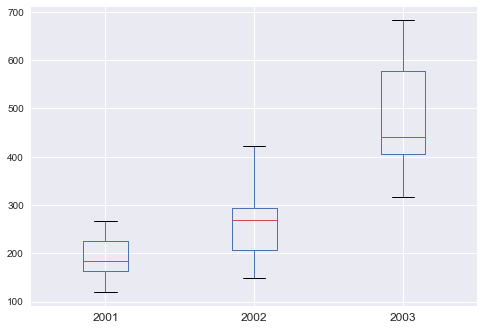

In [19]:
sales_annual_groups = sales_series.groupby(sales_series.index.year)
years = pd.DataFrame()
for name, group in sales_annual_groups:
    years[name] = group.values

years.boxplot(return_type='axes')

Box and Wiskers Plot by Month

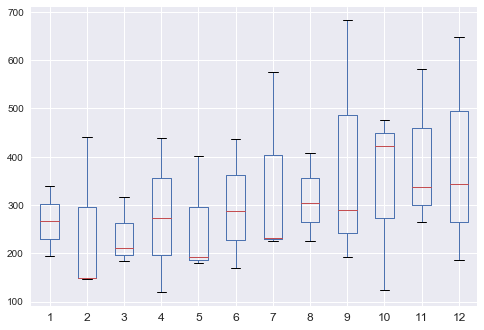

In [20]:
sales_monthly_groups = sales_series.groupby(sales_series.index.month)
months = pd.DataFrame()
for name, group in sales_monthly_groups:
    months[name] = group.values

months.boxplot(return_type='axes')

Heatmap 

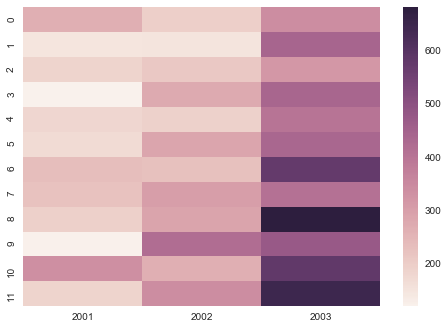

In [21]:
sns.heatmap(years)

Lag Scatter Plot

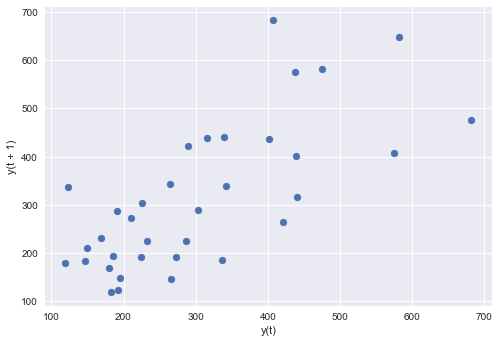

In [22]:
from pandas.tools.plotting import lag_plot

lag_plot(sales_series)

Autocorrelation plot

(detect seasonality)

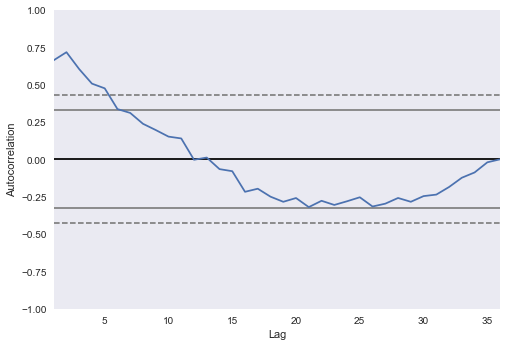

In [23]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(sales_series)

### Persistence Forecast Model

In [24]:
def model_persistence(x):
    return x

In [25]:
births_df = pd.DataFrame({'t': births_series.shift(1).values, 't+1': births_series.values})

In [26]:
y_true = births_df.loc[1:, 't+1'].values

In [42]:
y_persistence_pred = births_df.loc[1:, 't'].apply(lambda x: model_persistence(x)).values

In [41]:
persistence_rmse = sqrt(mean_squared_error(y_true, y_persistence_pred))
print("Root Mean Squared Error for Persistence Model: {}".format(persistence_rmse))

Root Mean Squared Error for Persistence Model: 9.177283229394606


### Autoregressive Forecast Model

In [29]:
from statsmodels.tsa.ar_model import AR

In [90]:
X = sales_series.values

In [91]:
int(len(X) * 0.8)

28

In [92]:
train_test_split = int(len(X) * 0.8)

In [96]:
X_train = X[:train_test_split]
X_test = X[train_test_split:]

In [97]:
model_autoregressive = AR(X_train)

In [98]:
model_autoregressive_fit = model_autoregressive.fit()

In [106]:
X_autoregressive_pred = model_autoregressive_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, dynamic=True)

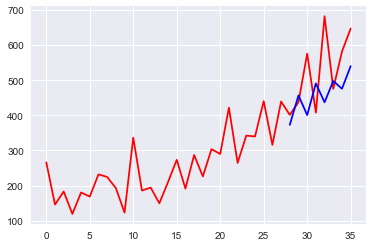

In [107]:
plt.plot(range(len(X)), X, 'r-')
plt.plot(range(train_test_split, len(X)), X_autoregressive_pred, 'b-')

### ARIMA Forecast Model

AutoRegressive + Integrated (remove trend and seasonality) + Moving Average

Order:
 * **p:** number of lag observations included in the model (lag order)
 * **d:** number of times that the raw observations are differenced (degree of differencing)
 * **q:** size of the moving average window (order of moving average)

In [183]:
from statsmodels.tsa.arima_model import ARIMA

In [206]:
model_arima_fit = model_arima.fit()

In [221]:
history = [x for x in X_train]
X_arima_pred = list()
for t in range(len(X_test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()[0]
    X_arima_pred.append(output)
    obs = X_test[t]
    history.append(obs)

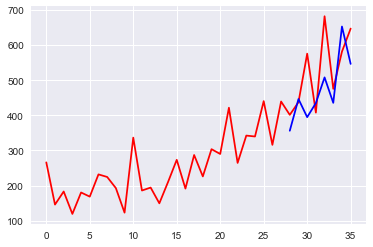

In [222]:
plt.plot(range(len(X)), X, 'r-')
plt.plot(range(train_test_split, len(X)), X_arima_pred, 'b-')

Using the predicted values

In [256]:
test_model = ARIMA(X_train, order=(5, 1, 0))
test_fit = test_model.fit()

In [257]:
pred = test_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, dynamic=True, typ='levels')

In [258]:
pred

array([ 356.08213456,  447.68445582,  379.66335273,  453.13992264,
        403.48001741,  465.16557887,  425.9782333 ,  475.46934422])

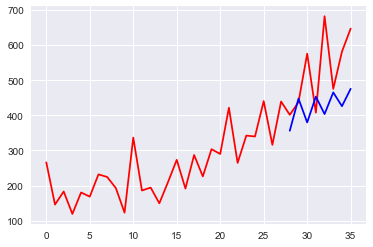

In [259]:
plt.plot(range(len(X)), X, 'r-')
plt.plot(range(train_test_split, len(X)), pred, 'b-')